In [1]:
import os
setup_script = os.path.join(os.environ['ENV_JUPYTER_SETUPS_DIR'], 'setup_sci_env_basic.py')
%run $setup_script

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [71]:
import scipy.io
from scipy import optimize

In [3]:
data = scipy.io.loadmat('ex3data1.mat')

In [46]:
features = data['X']
labels = data['y']
X = np.insert(data['X'], 0, 1, axis=1)
y = data['y'][:,0]

In [51]:
def show_img(img):
    plt.imshow(img, cmap='gray_r');

[10]


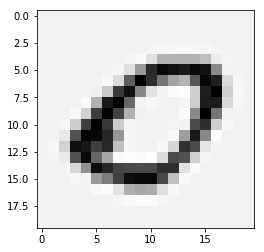

In [52]:
show_img((data['X'][0]).reshape([20,20]));
print(data['y'][0])

[10]


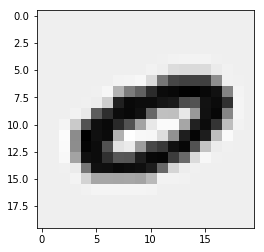

In [53]:
show_img((data['X'][2]).reshape([20,20]));
print(data['y'][2])

## One-vs-all logistic regression model

- $m$: number of samples, here 5000 handwritten digits

**Cost function:**

\begin{equation}
    J(\theta)
    =
    \frac{1}{m}
    \sum_{i=1}^{m}
    \left[
        -y^{i} \log( h_{\theta}(x^{(i)}) - (1-y^{(i)}) \log(1-h_{\theta}(x^{(i)})
    \right]
    +
    \frac{\lambda}{2m}
    \sum_{j=1}^{n}
    \theta^{2}_{j}
\end{equation}

**Model:**

\begin{equation}
    h_{\theta}(x^{(i)})
    =
    g(\theta^{T} x^{(i)})
\end{equation}

where $g(z)$ is the sigmoid function:

\begin{equation}
    g(z)
    =
    \frac{1}{1 + e^{-z}}
\end{equation}


\begin{equation}
    X
    =
    \begin{bmatrix}
    -- (x^{1})^{T} -- \\
    -- (x^{2})^{T} -- \\
    ... \\
    -- (x^{m})^{T} --
    \end{bmatrix}
\end{equation}
and
\begin{equation}
    \theta
    =
    \begin{bmatrix}
    \theta_{1} \\
    \theta_{2} \\
    ... \\
    \theta_{m}
    \end{bmatrix}
\end{equation}


**Gradient:**

The $j=0$ component:

\begin{equation}
    \frac{\partial J}{\partial \theta_{j}}
    =
    \frac{1}{m}
    \sum_{i=1}^{m}
    \left[
        (
        h_{\theta} (x^{i})
        -
        y^{i}
        )
        x^{i}_{j}
    \right]
\end{equation}

the $j \neq 0$-th component

\begin{equation}
    \frac{\partial J}{\partial \theta_{j}}
    =
    \frac{1}{m}
    \sum_{i=1}^{m}
    \left[
        (
        h_{\theta} (x^{i})
        -
        y^{i}
        )
        x^{i}_{j}
    \right]
    +
    \frac{\lambda}{m} \theta_{j}
\end{equation}

Vectorized form:

\begin{equation}
    \underline{\theta}'
    =
    \begin{bmatrix}
        0 \\
        \theta_{1} \\
        \theta_{2} \\
        ... \\
        \theta_{n}
    \end{bmatrix}
\end{equation}

\begin{equation}
    \nabla_{\theta} J
    =
    \frac{1}{m}
    \underline{\underline{X}}^{T}
    (
        \underline{h_{\theta}}(x)
        -
        \underline{y}
    )
    +
    \frac{\lambda}{m}
    \underline{\theta'}
\end{equation}

In [54]:
def sigmoid(z):
    s = 1.0/(1.0+np.exp(-z))
    return s

In [55]:
def hypothesis(X,theta):
    z = X.dot(theta)
    h = sigmoid(z)
    return h

In [56]:
def cost_function(X, y, theta, lam=0):
    m = len(X)
    h = hypothesis(X,theta)
    cost_vector = -y * np.log(h) - (1.0-y)*np.log(1.0 - h)
    regularization_term = np.sum(theta**2) * lam/(2.0*m)
    cost = np.sum(cost_vector)/m + regularization_term
    return cost

In [67]:
def gradient(X,y,theta,lam):
    """- X: mxn
       - y: mx1
       - theta: nx1
       - lam: 1"""
    m = len(X)
    h = hypothesis(X,theta)
    thetap = theta
    thetap[0] = 0
    gradient = (X.transpose().dot(h-y) + lam*thetap)/m
    return gradient

In [68]:
theta = np.random.uniform(high=0.1, size=401)

In [69]:
cost_function(X,y,theta)

-34.262107753321608

In [70]:
gradient(X,y,theta,lam=1.0)

array([ -4.57720829e+00,   1.90885600e-05,   8.52580456e-07,
         7.70344177e-06,   1.91693056e-05,   2.79425217e-05,
        -6.41434246e-04,  -8.33533613e-04,  -3.35445109e-04,
        -9.82745813e-05,  -1.17613239e-04,  -1.63452171e-05,
         3.63039627e-05,   7.79707438e-05,   1.67234039e-04,
         1.75554822e-04,   9.94549382e-05,   4.32860588e-05,
         2.35927462e-06,   1.48692217e-05,   1.97658299e-05,
         1.40979066e-05,   1.12575315e-05,   5.04354487e-06,
         6.28512145e-05,   7.87111721e-05,  -1.05517011e-03,
        -3.78733004e-03,  -5.27461066e-03,  -4.09721274e-03,
        -1.13131262e-03,   1.02748044e-03,   1.58413490e-03,
         1.70983749e-03,   1.26449446e-03,   9.54030904e-04,
         6.31780284e-04,   2.70888415e-04,   1.59727578e-04,
         4.37566258e-05,   1.65320436e-05,   1.31545446e-05,
        -8.27327870e-06,   7.01985615e-05,  -1.91981252e-04,
        -1.77286794e-03,  -9.90290526e-03,  -2.20307741e-02,
        -2.89059264e-02,

## Test area

In [72]:
y = (labels == 2)*1

In [73]:
z = np.dot(X,theta)

In [74]:
X.shape

(5000, 401)

In [75]:
h.shape

NameError: name 'h' is not defined

In [76]:
y.shape

(5000, 1)

In [83]:
z.shape

(5000,)

In [84]:
h = 1.0/(1.0 + np.exp(-z))

In [85]:
X.shape

(5000, 401)

In [86]:
theta.shape

(401,)

In [87]:
h.shape

(5000,)

In [88]:
y.shape

(5000, 1)

In [89]:
lam = 1.0

In [90]:
gradient = X.transpose().dot(h-y)

In [91]:
h.mean()

0.9158196948994537

In [92]:
cost_vector = -y*np.log(h) - (1.0-y)*np.log(1.0-h)